

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
### Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela

Greetings!

### Content
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

14 variables

### Questions -

- Patient show up depends on Patient age
- Patient show up depends on Patient Gender
- Patient show up depends on appointment month
- Patient show up depends on appointment hour
- Patient show up depends on SMS_received for his appionment


## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data
df = pd.read_csv('KaggleV2-May-2016.csv', parse_dates=True)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.shape

(110527, 14)

### NOW
- Modify columns : PatientId, AppointmentId
- Reformat columns : ScheduledDay, AppointmentDay
- Get dummies for No-show
- Drop extra columns
- Check duplicated values
- Unique values for each columns

In [7]:
# - Modify columns : PatientId, AppointmentId

df['PatientId'] = df['PatientId'].astype('str')
df['PatientId'] = df['PatientId'].str.split('.', expand=True)[0]
df['AppointmentID'] = df['AppointmentID'].astype('str')

In [8]:
# - Reformat columns : ScheduledDay, AppointmentDay

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format="%Y-%m-%dT%H:%M:%SZ")
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format="%Y-%m-%dT%H:%M:%SZ")

In [9]:
# - Get dummies for No-show column

df[['Present','Absent']] = pd.get_dummies(df['No-show'])

In [10]:
# - Drop extra columns

df.drop(['Absent','No-show'], inplace=True, axis=1)

In [11]:
# - Check duplicated values
for _ in df.columns:
    print(_,sum(df[_].duplicated()))

PatientId 48228
AppointmentID 0
Gender 110525
ScheduledDay 6978
AppointmentDay 110500
Age 110423
Neighbourhood 110446
Scholarship 110525
Hipertension 110525
Diabetes 110525
Alcoholism 110525
Handcap 110522
SMS_received 110525
Present 110525


In [12]:
# - Unique values for each columns
for _ in df.columns:
    print(_,len(df[_].unique()))
    print((df[_].unique()),'\n')

PatientId 62299
['29872499824296' '558997776694438' '4262962299951' ... '72633149253362'
 '996997666245785' '15576631729893'] 

AppointmentID 110527
['5642903' '5642503' '5642549' ... '5630692' '5630323' '5629448'] 

Gender 2
['F' 'M'] 

ScheduledDay 103549
['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ... '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000'] 

AppointmentDay 27
['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '

In [13]:
# Calculate waiting time

df['Waiting_Time'] = df['ScheduledDay'] - df['AppointmentDay']
dates = df['Waiting_Time'].abs()

def dayCount(dates):
    return dates.days

dates = dates.map(dayCount)

In [14]:
# Separat AppointmentDay to month ,day and hour

df['Month_App'] = df['AppointmentDay'].dt.month_name()
df['Day_App'] = df['AppointmentDay'].dt.day_name()
df['Hour_App'] = df['ScheduledDay'].dt.hour

In [15]:
# Reorder Columns

column_order = df.columns.tolist()
column_order = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship',
                'Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','Waiting_Time','Month_App','Day_App','Hour_App',
                'Present']
df = df[column_order]

## Our data now

In [16]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Time,Month_App,Day_App,Hour_App,Present
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,18:38:08,April,Friday,18,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,16:08:27,April,Friday,16,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,16:19:04,April,Friday,16,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,17:29:31,April,Friday,17,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,16:07:23,April,Friday,16,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Waiting_Time      110527 non-null timedelta64[ns]
Month_App         110527 non-null object
Day_App           110527 non-null object
Hour_App          110527 non-null int64
Present           110527 non-null uint8
dtypes: datetime64[ns](2), int64(8), object(6), timedelta64[ns](1), uint8(1)
memory usage: 14.4+ MB


In [18]:
df.shape

(110527, 18)

## Data Cleaning

In [19]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Time,Hour_App,Present
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,-10 days +06:51:25.838039,10.774517,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15 days 05:51:27.891504,3.216189,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179 days +10:40:59,6.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15 days +16:18:25.500000,8.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4 days +12:37:42,10.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 08:18:28.500000,13.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6 days 13:49:20,21.000000,1.000000


### NOW 
    - Age coulmn having negative number must remove it

In [20]:
df[df['Age'] < 0].index
df.drop(df[df['Age'] < 0].index, inplace=True)

In [21]:
df.shape

(110526, 18)

In [22]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Time,Hour_App,Present
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,-10 days +06:51:17.952047,10.774542,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15 days 05:51:31.240428,3.216192,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179 days +10:40:59,6.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15 days +16:18:22.250000,8.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4 days +12:37:27,10.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 08:18:28,13.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6 days 13:49:20,21.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


In [28]:
pres = df['Present'].value_counts()
pres

1    88207
0    22319
Name: Present, dtype: int64

Text(0.5, 0, 'Appointment')

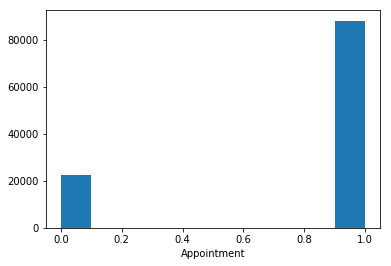

In [35]:
plt.hist( df['Present']) 
plt.xlabel('Appointment')

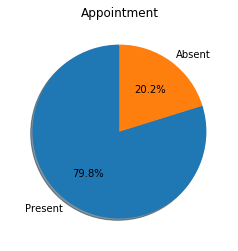

In [37]:
x = ['Present','Absent']
plt.pie(pres, labels = x, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Appointment');

It is clear that the majority of patients attended their appointment with a rate of 79.8%, but the absence rate, which is approximately 20%, must be studied.

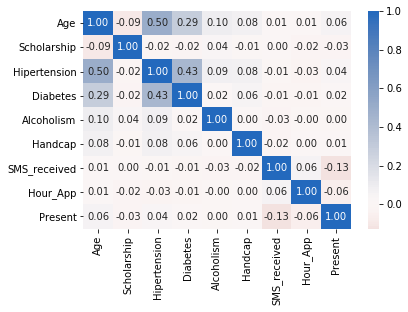

In [24]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### Research Question 1 ( Patient show up depends on  Patient age )

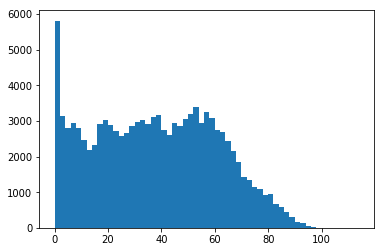

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
bin_size = np.arange(df['Age'].min(), df['Age'].max(), 2)
plt.hist(df['Age'], bins=bin_size);

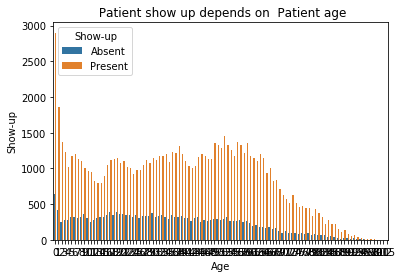

In [26]:
sb.countplot(data=df, x='Age', hue='Present');
plt.title(' Patient show up depends on  Patient age')
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Age')
plt.ylabel('Show-up');

According to family care patients less than 2 years attend

### Research Question 2  (Patient show up depends on Patient Gender)

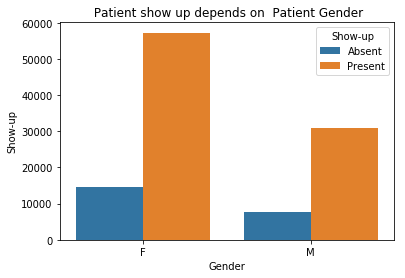

In [27]:
sb.countplot(data=df, x='Gender', hue='Present');
plt.title(' Patient show up depends on  Patient Gender')
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Gender')
plt.ylabel('Show-up');

Most patient are male and the majorety of them present in there appointment

### Research Question 3  (Patient show up depends on appointment month)

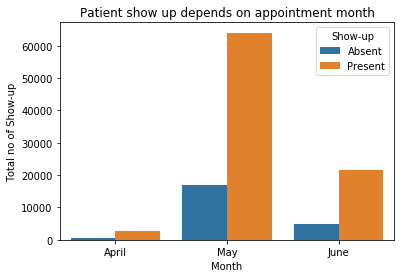

In [28]:
sb.countplot(data=df, x='Month_App', hue='Present');
plt.title('Patient show up depends on appointment month')
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Month')
plt.ylabel('Total no of Show-up');

 It's notice that most appointments were made in May

### Research Question 4  (Patient show up depends on appointment hour)

Text(0, 0.5, 'Show-up')

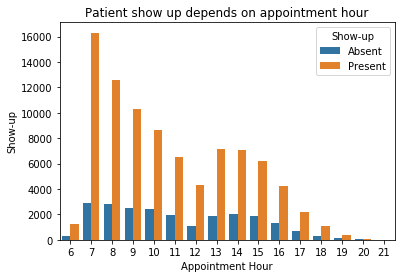

In [29]:
sb.countplot(data=df, x='Hour_App', hue='Present');
plt.title('Patient show up depends on appointment hour');
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Appointment Hour')
plt.ylabel('Show-up')

This plot shows that most appoinment start with the beging of the day and decrease till afternoon and rise again after day work hour

#### Research Question 5 (Patient show up depends on SMS_received for his appionment)

Text(0, 0.5, 'Show-up')

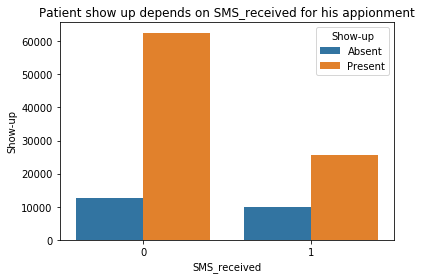

In [30]:
sb.countplot(data=df, x='SMS_received', hue='Present');
plt.title('Patient show up depends on SMS_received for his appionment');
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('SMS_received')
plt.ylabel('Show-up')

This plot shows that most patient doen't depend on receiveing SMS to get his appiontment

<a id='conclusions'></a>
## Conclusions
- According to family care patients less than 2 years attend
- Most patient are male and the majorety of them present in there appointment
- It's notice that most appointments were made in May
- Most appoinment start with the beging of the day and decrease till afternoon and rise again after day work hour
- Most patient doen't depend on receiveing SMS to get his appiontmen

### limitations
As we need to reduce the ratio of absence for my point of view the limitation of data was in:
- Data of patients who were absent are not sufficient to determine the reasons for absence.
- Other factors can be added, such as the patient’s job, patient’s work hours, and the distance between him and the place of reservation